<a href="https://colab.research.google.com/github/shauryam-daksham/TSF_Task_2_Unsupervised_Learning/blob/main/TSF_Task_2_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Dhruv Khatri**


Task 2: Predicting the optimum number of clusters and representing it visually

GRIP @ The Sparks Foundation June'24

data - https://bit.ly/3kXTdox
     


**Import Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


**Load Data**

In [3]:
df=pd.read_csv('Iris.csv', index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


**Visualize Data**
   

Text(0.5, 1.0, 'Scatter Plot')

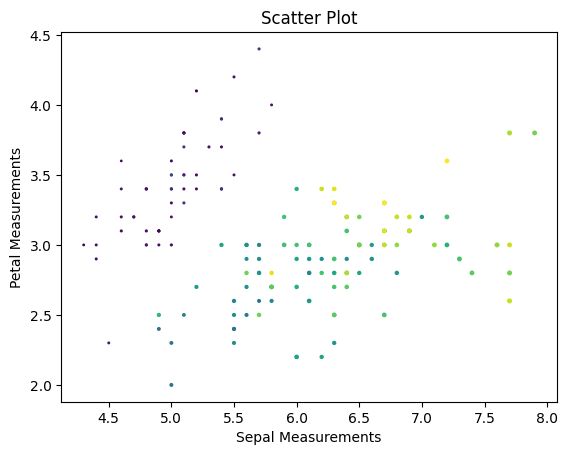

In [11]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'],df['PetalLengthCm'],df['PetalWidthCm'])
plt.xlabel('Sepal Measurements')
plt.ylabel('Petal Measurements')
plt.title('Scatter Plot')

**Assume No. of Clusters = 3**

In [14]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [15]:
y_predicted= km.fit_predict(df[['PetalLengthCm','PetalWidthCm','SepalLengthCm', 'SepalWidthCm']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [16]:
df['Cluster']= y_predicted
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1


**Use MinMaxScaler to map the Ranges of Continuous Features between 0 and 1**

In [17]:
scaler=MinMaxScaler()
scaler.fit(df[['PetalLengthCm']])
df['PetalLengthCm']=scaler.transform(df[['PetalLengthCm']])

scaler.fit(df[['PetalWidthCm']])
df['PetalWidthCm']=scaler.transform(df[['PetalWidthCm']])

scaler.fit(df[['SepalLengthCm']])
df['SepalLengthCm']=scaler.transform(df[['SepalLengthCm']])

scaler.fit(df[['SepalWidthCm']])
df['SepalWidthCm']=scaler.transform(df[['SepalWidthCm']])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
Id,,,,,,
1,0.222222,0.625000,0.067797,0.041667,Iris-setosa,1
2,0.166667,0.416667,0.067797,0.041667,Iris-setosa,1
3,0.111111,0.500000,0.050847,0.041667,Iris-setosa,1
4,0.083333,0.458333,0.084746,0.041667,Iris-setosa,1
5,0.194444,0.666667,0.067797,0.041667,Iris-setosa,1


Text(0.5, 1.0, 'Scatter Plot with Range 0 to 1')

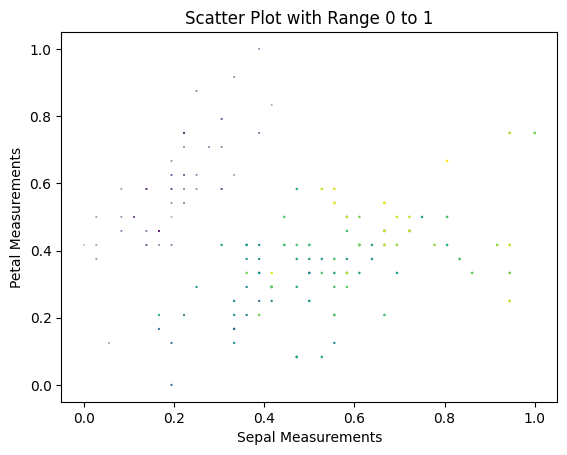

In [20]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'],df['PetalLengthCm'],df['PetalWidthCm'])
plt.xlabel('Sepal Measurements')
plt.ylabel('Petal Measurements')
plt.title('Scatter Plot with Range 0 to 1')

**Elbow Method**

In [21]:
km.cluster_centers_

array([[5.74210526, 2.07105263, 6.85      , 3.07368421],
       [1.464     , 0.244     , 5.006     , 3.418     ],
       [4.39354839, 1.43387097, 5.9016129 , 2.7483871 ]])

In [22]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['PetalLengthCm','PetalWidthCm','SepalLengthCm', 'SepalWidthCm']])
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

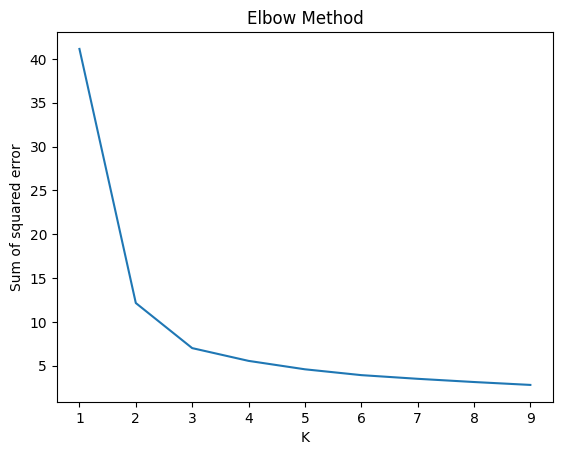

In [23]:
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

**Conclusion:**

The assumed value of K Mean Clusters is equal to the actual value of K Mean Clusters.